In [1]:
## MLB bang detection
# preprocessing of audio files
import os
import numpy as np
import soundfile as sf # for opening FLAC
#import librosa # for MFCC
from scipy.signal import spectrogram

# converts all FLAC files in a directory to a spectrogram and with a label
def read_from_file_dir(path, label):
    for filename in os.listdir(path):
        file_path = os.path.join(path, filename)
        audio_data, sample_rate = sf.read(file_path)

        frequencies, times, spectrogram_data = spectrogram(audio_data, sample_rate)
        
        add = spectrogram_data.flatten().reshape(-1)
        audio_features.append(add[:253872]) # truncates longer audio files to be consistent
        # use directory as name of label
        labels.append(label)

audio_features = [] # array of matrices (spectrograms) -> used as features for model
labels = [] # bang(1) or no bang(0)

# add training data with no bangs
path_dir_nbang = "no_bang"  # folder with training data with no anomaly present
read_from_file_dir(path_dir_nbang, 0)

# add training data with bangs
path_dir_bang = "bang"  # folder with training data with anomaly present
read_from_file_dir(path_dir_bang, 1)


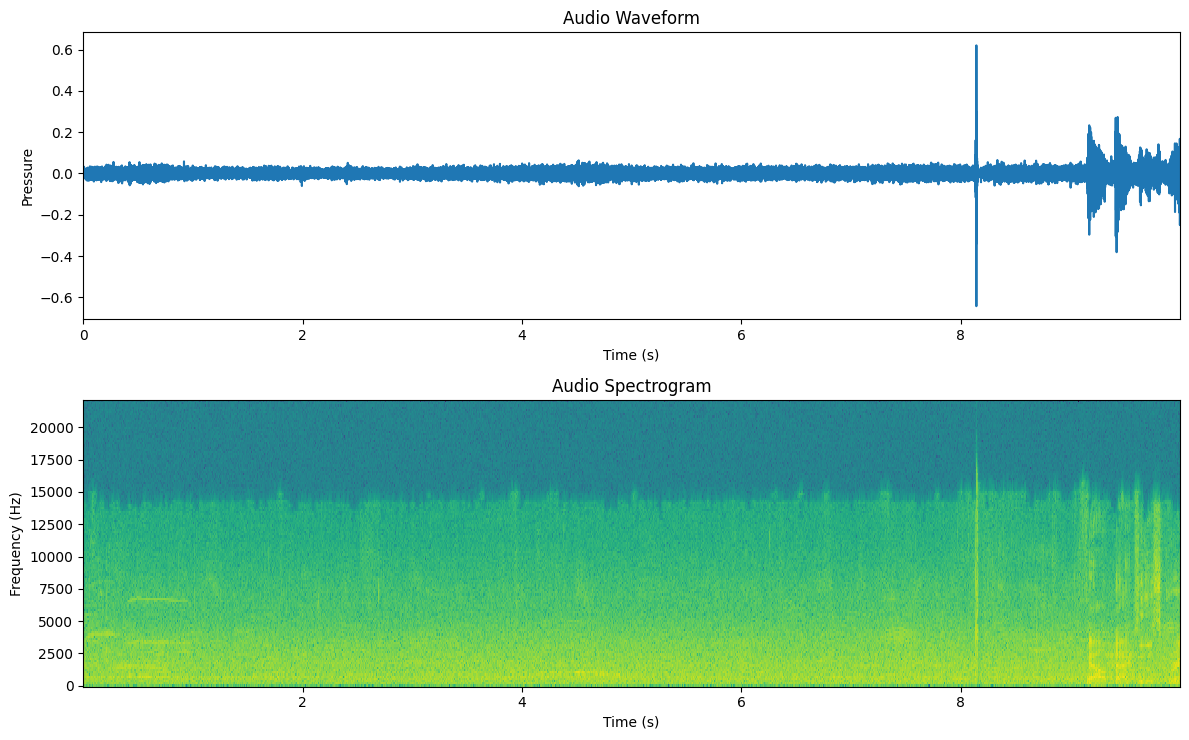

In [42]:
# audio waveform and spectrogram representation of one sample
import matplotlib.pyplot as plt
file_path = "no_bang" 
files = os.listdir(file_path)
file = os.path.join(file_path, files[0])
audio_data, sample_rate = sf.read(file)
time = np.arange(0, len(audio_data)) / sample_rate

frequences, times, spectrogram_data = spectrogram(audio_data, sample_rate)

rows = 2
cols = 1
plt.figure(figsize = (12, 7.5))
plt.subplot(rows, cols, 1)
plt.plot(time, audio_data)
plt.xlim(0, max(time)) # realign waveform (spectrogram has a shorter time axis)
plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Pressure")

plt.subplot(rows, cols, 2)
plt.pcolormesh(times, frequences, np.log10(spectrogram_data))
plt.title("Audio Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()

In [33]:
# training random forest model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

state = 727 # random state

audio_features = np.array(audio_features, dtype="object")
labels = np.array(labels, dtype="object")

X_train, X_test, y_train, y_test = train_test_split(audio_features, labels, test_size = .2, random_state = state)

y_train = np.ravel(y_train).astype(int) # ensures type and 1d y_train

random_forst_classifier = RandomForestClassifier(n_estimators = 50, random_state = state)


random_forst_classifier.fit(X_train, y_train)

y_test = np.ravel(y_test).astype(int)

print(random_forst_classifier.score(X_test, y_test))

0.8070175438596491
